### DATA DESCRIPTION: 

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

 RowNumber: Row Numbers from 1 to 10000 

 CustomerId: Unique Ids for bank customer identification 

 Surname: Customer's last name 

 CreditScore: Credit score of the customer 

 Geography: The country from which the customer belongs 

 Gender: Male or Female 

 Age: Age of the customer 

 Tenure: Number of years for which the customer has been with the bank 

 Balance: Bank balance of the customer 

 NumOfProducts: Number of bank products the customer is utilising 

 HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not 

 IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not 

 EstimatedSalary: Estimated salary of the customer in Dollars 

 Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

 > Target Column Description: Exited is a class label used to divide into groups (customer closed account or not). 
 

In [2]:
import csv
import pandas as pd
import numpy as np

df=pd.read_csv("Churn_Modelling.csv")

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 	Summarization of  important observations from the dataset

In [3]:
 df.shape #There are 10k rows and 14 columns

(10000, 14)

In [4]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Numerical features
n=df.select_dtypes(include=np.number)
n.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [6]:
#categorical features
c=df.select_dtypes(include='O')
c.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [7]:
#Five point summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#five point summary including categorical features
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
# % number of observations in each categorical variable
import matplotlib.pyplot as plt
df.Gender.value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of Gender')
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
#Male customers are higher in proportion as compared to females.

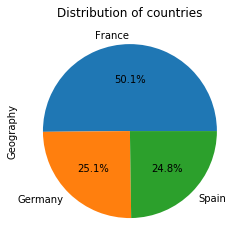

In [11]:
df.Geography.value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of countries')
plt.show()

In [12]:
#The dataset involves lot of customers from France and almost equal number of customers from france and spain

In [13]:
#Surname contains 2932 unique records.
df.Surname.nunique()

2932

### 	Check for defects in the data and  performing necessary actions to ‘fix’ these defects 



In [14]:
# Check for null values
df.isna().sum()
#This dataset contains no null value.

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

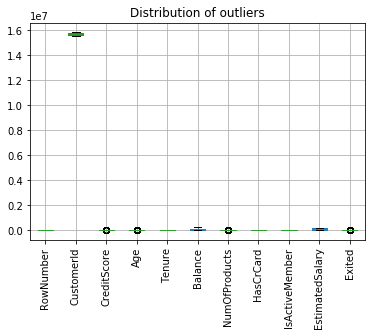

In [15]:
# Check for outliers
df.boxplot()
plt.xticks(rotation=90)
plt.title('Distribution of outliers')
plt.show()

In [16]:
#There is presence of outliers in certain independent features along with the target feature 'Exited'

In [17]:
# Feature engineering
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

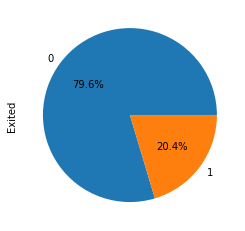

In [18]:
# Distribution of target variable 'Exited'
import seaborn as sns
df.Exited.value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

In [19]:
#From the above plot we can say that the data of customers who have exited the bank are lesser in proportion of just
#20.4%. ie the dataset is a highly imbalanced dataset. So, we need to perform either upsampling or downsampling 
#to rectify this problem.

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [21]:
exited=df['Exited'].value_counts()[1]
not_exited=df['Exited'].value_counts()[0]

In [22]:
dum=pd.get_dummies(df[['Gender','Geography']],drop_first=True)
df=df.drop(['Gender','Geography'],axis=1)
df=pd.concat([df,dum],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [23]:
x=df.drop('Exited',axis=1)
y=df['Exited']
pipe=make_pipeline(SMOTE(sampling_strategy={1:exited}),NearMiss(sampling_strategy={0:not_exited}))
x,y=pipe.fit_resample(x,y)

In [24]:
x.shape

(10000, 11)

In [25]:
y.shape

(10000,)

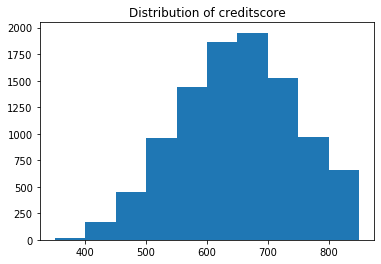

In [26]:
#Univariate analysis of all numerical features
plt.hist(df['CreditScore'])
plt.title('Distribution of creditscore')
plt.show()

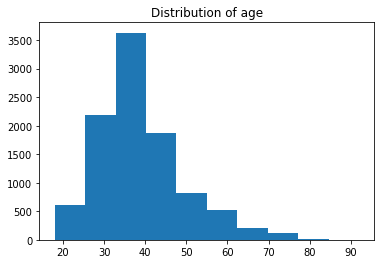

In [27]:
plt.hist(df['Age'])
plt.title('Distribution of age')
plt.show()

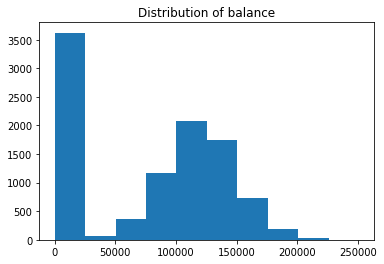

In [28]:
plt.hist(df['Balance'])
plt.title('Distribution of balance')
plt.show()

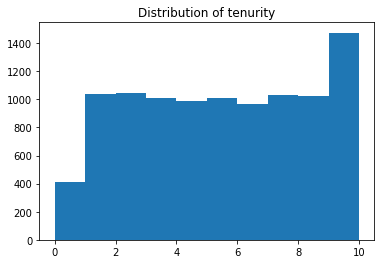

In [29]:
plt.hist(df['Tenure'])
plt.title('Distribution of tenurity')
plt.show()

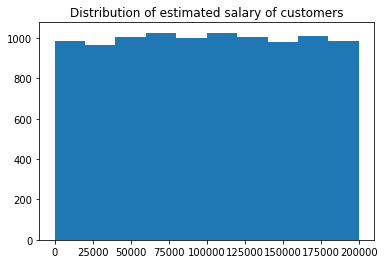

In [30]:
plt.hist(df['EstimatedSalary'])
plt.title('Distribution of estimated salary of customers')
plt.show()

In [31]:
#None of the above shown features are normal in nature.
#Maximum credit score is around 650.
#Maximum salary is around 2 lacs.
#Maximum tenurity is 10 years
#Age range is between 30-40

### Summarization of relationship among variables.


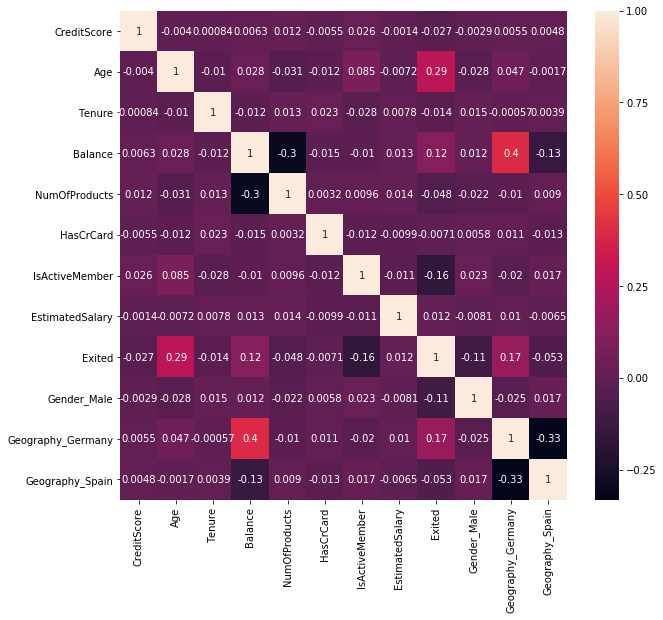

In [32]:
# Correlation plot
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [33]:
#There is no independent feature correlated with the exited column.
#Also, there is no multicollinearity.

In [34]:
#Statistical tests of independent variables with the target
#Age and balance shows somewhat positive correlation and hence we perfrom stats test only for those features
#Age vs Exited
#Hypothesis:
#Ho: mean age of exited customers = mean age of not exited customers
#Ha: mean age of exited customers != mean age of not exited customers
#Here, we have 2 samples and hence we will perform 2 sample t test
import scipy.stats as stats
age_exited=df[df.Exited==1]['Age']
age_not_exited=df[df.Exited==0]['Age']

In [35]:
#Check for nomality
stats.shapiro(age_exited)#not normal

(0.9977729916572571, 0.005956501234322786)

In [36]:
stats.shapiro(age_not_exited)#not normal

/home/deploy/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9062122106552124, 0.0)

In [37]:
stats.mannwhitneyu(age_exited,age_not_exited)

MannwhitneyuResult(statistic=4345981.5, pvalue=1.6052007159685838e-230)

In [38]:
#P value is lesser than 0.05. So, alternate hypothesis is accepted.So, both the means of age of customers exited
# and not exited ain't equal.

In [39]:
#post-hoc analysis
np.mean(age_exited)

44.8379970544919

In [40]:
np.mean(age_not_exited)

37.40838879819164

In [41]:
#Older people have exited most.

In [42]:
#Balance vs exited
bal_exited=df[df.Exited==1]['Balance']
bal_not_exited=df[df.Exited==0]['Balance']

In [43]:
np.mean(bal_exited)

91108.53933726063

In [44]:
np.mean(bal_not_exited)

72745.29677885193

In [45]:
#Balance of customers who have exited is higher than existing customers.

### 	Spliting the dataset into train and test (70:30) 

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3)

In [47]:
np.mean(y_train)

0.20742857142857143

In [48]:
np.mean(y_test)

0.195

In [49]:
#Means of both train and test data are almost equal and hence we can say that train and test are representative of
#the overall data.

### Base model building


In [50]:
#There is presence of some outliers.So, we are gonna pass the data through power transformer so that we dont miss
#out those data as well.
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
power_train=pt.fit_transform(x_train)
power_test=pt.transform(x_test)

In [51]:
#Standardization of the data.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_train=sc.fit_transform(power_train)
sc_test=sc.transform(power_test)

In [52]:
#Base model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [53]:
parameters={'C':[0.1,0.5,1,5]}
lr=LogisticRegression()
lr.fit(sc_train,y_train)
grid=GridSearchCV(lr,parameters)
grid.fit(sc_train,y_train)
y_pred=lr.predict(sc_test)

In [54]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy is',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)


Accuracy is 0.8323333333333334
[[2342   73]
 [ 430  155]]


In [55]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2415
           1       0.68      0.26      0.38       585

    accuracy                           0.83      3000
   macro avg       0.76      0.62      0.64      3000
weighted avg       0.81      0.83      0.80      3000



In [56]:
print(metrics.cohen_kappa_score(y_test,y_pred))

0.3053253784112252


In [ ]:
#We have obtained a value of 0.3 chance of agreement from cohen kappa score .We should try to come up with a better
#agreement score.

In [57]:
score=roc_auc_score(y_test,y_pred)
print(score)

0.6173647608430216


In [58]:
y_pred_prob=grid.predict_proba(sc_test)[:,1]
print(y_pred_prob[0])
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)
roc_auc=roc_auc_score(y_test,y_pred_prob)
print('Roc auc score',roc_auc)

0.06475055250410905
Roc auc score 0.7947656208525775


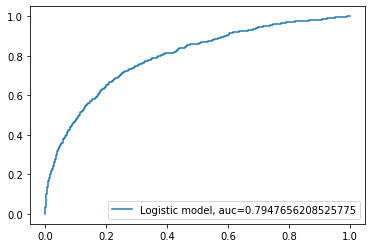

In [59]:
plt.plot(fpr,tpr,label='Logistic model, auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [60]:
print(round(score,2))
print(round(y_pred_prob[0],2))
print(round(roc_auc,2))

0.62
0.06
0.79


In [61]:
#Using logictis regression we obtained an accuracy of 83%.
#Out of 3000 records, 503 records are missclassified. Out of which 73 records are false positive and 430 are 
#false negative.
#So, 430 records are present and predicted not to be present and 73 records are predicted to present but are not
#actually present.
# 2342 records are true positive which have been predicted correctly as positive and 155 records are predcited 
#correctly as negative.

### Final model building


In [62]:
#KNN classifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,25):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,sc_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors classifier scores for different k values')

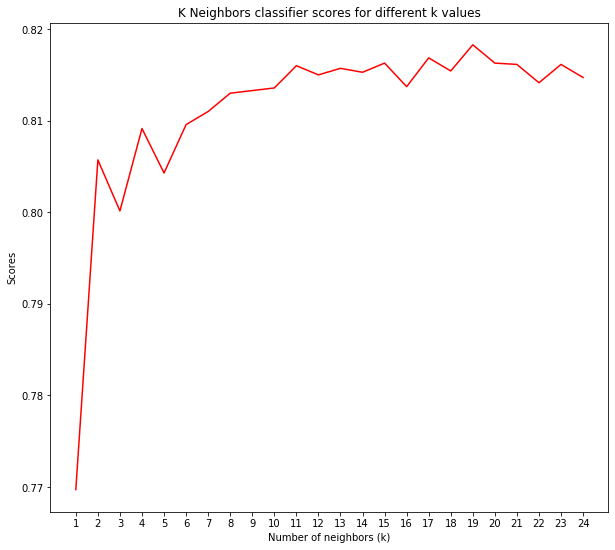

In [63]:
plt.figure(figsize=(10,9))
plt.plot([k for k in range(1,25)],knn_scores,color='red')
#for i in range(1,21):
   # plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,25)])
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Scores')
plt.title('K Neighbors classifier scores for different k values')

In [64]:
knn_classifier=KNeighborsClassifier(n_neighbors=20)
score=cross_val_score(knn_classifier,sc_train,y_train,cv=10)

In [65]:
knn_classifier.fit(sc_train,y_train)
y_pred=knn_classifier.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

accuracy 0.832
[[2365   50]
 [ 454  131]]


In [66]:
print(metrics.cohen_kappa_score(y_test,y_pred))

0.2752476956040323


In [ ]:
#We have obtained a value of 0.27 chance of agreement from the annotators. There is scope for improvement further.

In [67]:
#using knn classifier we have obtained an accuracy of 83.2% yet again.

In [68]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
grid_search_cv=GridSearchCV(DecisionTreeClassifier(random_state=10),params,verbose=1,cv=3)
grid_search_cv.fit(sc_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    9.7s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [69]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=29, random_state=10)

In [70]:
dct=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=29,min_samples_split=4)
dct.fit(sc_train,y_train)
y_pred=dct.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.864
[[2301  114]
 [ 294  291]]


In [71]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2415
           1       0.72      0.50      0.59       585

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [72]:
print(metrics.cohen_kappa_score(y_test,y_pred))

0.5096448530737335


In [73]:
#Using decision tree classifier we have improved the accuracy of our model from 83% to 86.4%.

In [ ]:
#From decision tree classifier we have obtained a cohen kappa score of 0.51 chance of agreement, which is an improvement
# from previous models.

In [74]:
#Using randomforestclassifier
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]
random_grid={'n_estimators':n_estimators,
             'max_features': max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=3,
                               verbose=2,random_state=10)
rf_randomcv.fit(sc_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=entropy 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=entropy, total=  13.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=entropy, total=  13.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=entropy 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=entropy, total=  13.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=gini 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=gini, total=   3.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=gini 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=gini, total=   3.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=230, criterion=gini 
[CV]  n_estimato

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=560, criterion=gini, total=   4.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=gini 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=gini, total=   8.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=gini 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=gini, total=   8.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=gini 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=560, criterion=gini, total=   8.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=20

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [76]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'gini'}

In [77]:
rf=RandomForestClassifier(n_estimators=1000,min_samples_split=14,min_samples_leaf=1,max_features='auto',
                          max_depth=780,criterion='gini')
rf.fit(sc_train,y_train)
y_pred=rf.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.8706666666666667
[[2321   94]
 [ 294  291]]


In [78]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2415
           1       0.76      0.50      0.60       585

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [79]:
print(metrics.cohen_kappa_score(y_test,y_pred))

0.5267426968347868


In [ ]:
#Using randomforestclassifier we have obtained 0.526 chance of agreement, which is an improvement from previous model.

In [80]:
#We have improved the accuracy of the model from 86.4% to 87% here.

In [81]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(sc_train,y_train)
y_pred=gbc.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.8716666666666667
[[2328   87]
 [ 298  287]]


In [82]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2415
           1       0.77      0.49      0.60       585

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [83]:
print(metrics.cohen_kappa_score(y_test,y_pred))

0.5265267973534693


In [ ]:
#Using gradient boosting we have obtained a cohen kappa score of 0.53 (approx) chance of agreement, which is an
#improvement from the previous model.

In [84]:
#Using Gradient boosting we have improved the model accuracy from 87 to 87.16%.

In [85]:
#XG Boost
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(sc_train,y_train)
y_pred=xgb.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.872
[[2331   84]
 [ 300  285]]


In [86]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2415
           1       0.77      0.49      0.60       585

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [87]:
print(metrics.cohen_kappa_score(y_test,y_pred))

0.525978594970929


In [ ]:
#Looks like our final cohen kappa score is 0.53. Therefore, in our model we have 0.53 chance of agreement from 
#the raters.

In [88]:
#Using XG boost we have improved the model accuracy from 87.16 to 87.2%.
#With 3000 records, 384 records have been misclassified.
#2616 records have been correctly classified. Out of which 2331 records are predicted to be rightly true and
#285 records have been predicted to be rightly false.
#84 records have been falsely predicted to be true and 300 records have been falsely predicted to be negative.
#Our precision is 77%. So, 77 percentage of the customers are predicted to exit the bank but are retaining customers
#Recall is 49%. So, 49 percentage of the customers are predicted to retain but have exited the bank.
#We have a F1 score of 60%.

### Summary of the overall fit of the model

Initially, we made use of logistic regression as our base model and obtained an accuracy of 83% with a cohen kappa score of 0.3 chance of agreement from the annotators.
There seemed to be further scope of improvement from the base model, so we tried implementing various modeling techniques to come up with a better acracy than our base model.
So, we started with knn classifier, which showed just 0.2% increase in accuracy from our base model with an overall accuracy of 83.2% and a cohen kappa score of 0.2, which was not satisfatory.
Next, we built a model using decision tree classifier which showed good improvement in accuracy to a value of 86.4% and also a very good improvement in our cohen kappa score to 0.51.
Further, we tried using various ensemble bootstrap and boosting techniques in the light for scope of improvement.
We made use of random forest classifier which gave us an accuracy of 87% and a cohen kappa score of 0.526
Likewise, gradient boosting also gave us an accuracy of 87.16 and a cohen kappa score of 0.526
and xgboost with an accuracy of 87.2% and a cohen kappa score of approximately 0.53.

So, finally we have improved our base model to an accuracy of 87.2%.

Credit score has a impact on our target variable exiting. Since, people who dont have good credit score and less likely to use the bank account for any transfer. Hence, their bank account is not frequently used and may leave the bank due to various reasons.Likewise, balance also plays an role. If the customers dont retain a good balance then they are less likely to use the bank and may leave.
Tenure customers who have used the bank for a long time will have good trust on the bank and are not so likely to leave the bank. Likewise, active customers are also less likely to leave the bank and also they are the ones who make use of most of the bank products.
People who earn a good salary are also less likely to leave the bank unless and until they dont like the bank service. 
So, considering all these factors we can say that the following features have a direct effect on our target which is customers exiting the bank:
Credit score, Balance amount, Tenurity, active member, number of product used and salary estimation

# Business interpretation



Our problem statement is to predict the customers leaving the bank and interpreting the reason for their exit.
We have obtained an precision of 77%. So, there is 77 % chances that the retaining customers are wrongly predicted to exit the bank. Recall is 49 % So, there is 49% chance that the customers who are actually exiting are wrongly predicted to stay in the bank.

In our case , both type 1 and type 2 errors are costly because,
if we predict the retaining customers wrongly then we will face a huge loss on bank revenue, which would lead to a huge disruption in our annual trend.
In case where we wrongly predict exiting customers then those customers would not been given much benefits compared to our other customers which would further disrupt their relationship with the bank and they may lose trust and hence decide to exit the bank eventually.

So, to balance this out we have a F1-score of 60%. Since, we here consider both our errors are costly keeping in mind of future constraints.